In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the paths to the train, test, and validation folders
train_dir = '/content/drive/MyDrive/CSE428 Project/archive/train'
validation_dir = '/content/drive/MyDrive/CSE428 Project/archive/valid'
test_dir = '/content/drive/MyDrive/CSE428 Project/archive/test'

# Create an ImageDataGenerator instance for each set (you can apply different preprocessing here)
train_datagen = ImageDataGenerator(rescale=1./255,  # Rescale pixel values
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')


Found 13517 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [5]:
from tensorflow.keras import layers, models

# Step 1: Define the CNN model architecture
model = models.Sequential()

# Input Layer
model.add(layers.Input(shape=(224, 224, 3)))

# Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added BatchNorm
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added BatchNorm
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Added Dropout

# Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added BatchNorm
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added BatchNorm
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Added Dropout

# Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added BatchNorm
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added BatchNorm
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))  # Added Dropout

# Replace Flatten with Global Average Pooling
model.add(layers.GlobalAveragePooling2D())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))  # Reduced size to 128
model.add(layers.Dropout(0.5))  # Added Dropout
model.add(layers.Dense(100, activation='softmax'))  # Output layer for 100 classes

# Model summary (optional, to inspect architecture)
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 318,212 (1.21 MB)

 Trainable params: 317,316 (1.21 MB)

 Non-trainable params: 896 (3.50 KB)

In [6]:
### Use this part next

# Step 2: Compile the model with a specific learning rate

from tensorflow.keras.callbacks import EarlyStopping


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

# Stop training if validation accuracy doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10,  # Start with 10-20 epochs
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    callbacks=[early_stopping])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/211 ━━━━━━━━━━━━━━━━━━━━ 2:59:29 52s/step - accuracy: 0.0065 - loss: 5.1389

KeyboardInterrupt: 

In [ ]:
# Step 4: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Step 5: Get training and validation accuracy from history
train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

# Print the accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')




16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.3484 - loss: 2.8724
Test Accuracy: 0.36
Training Accuracy: 0.44
Validation Accuracy: 0.44


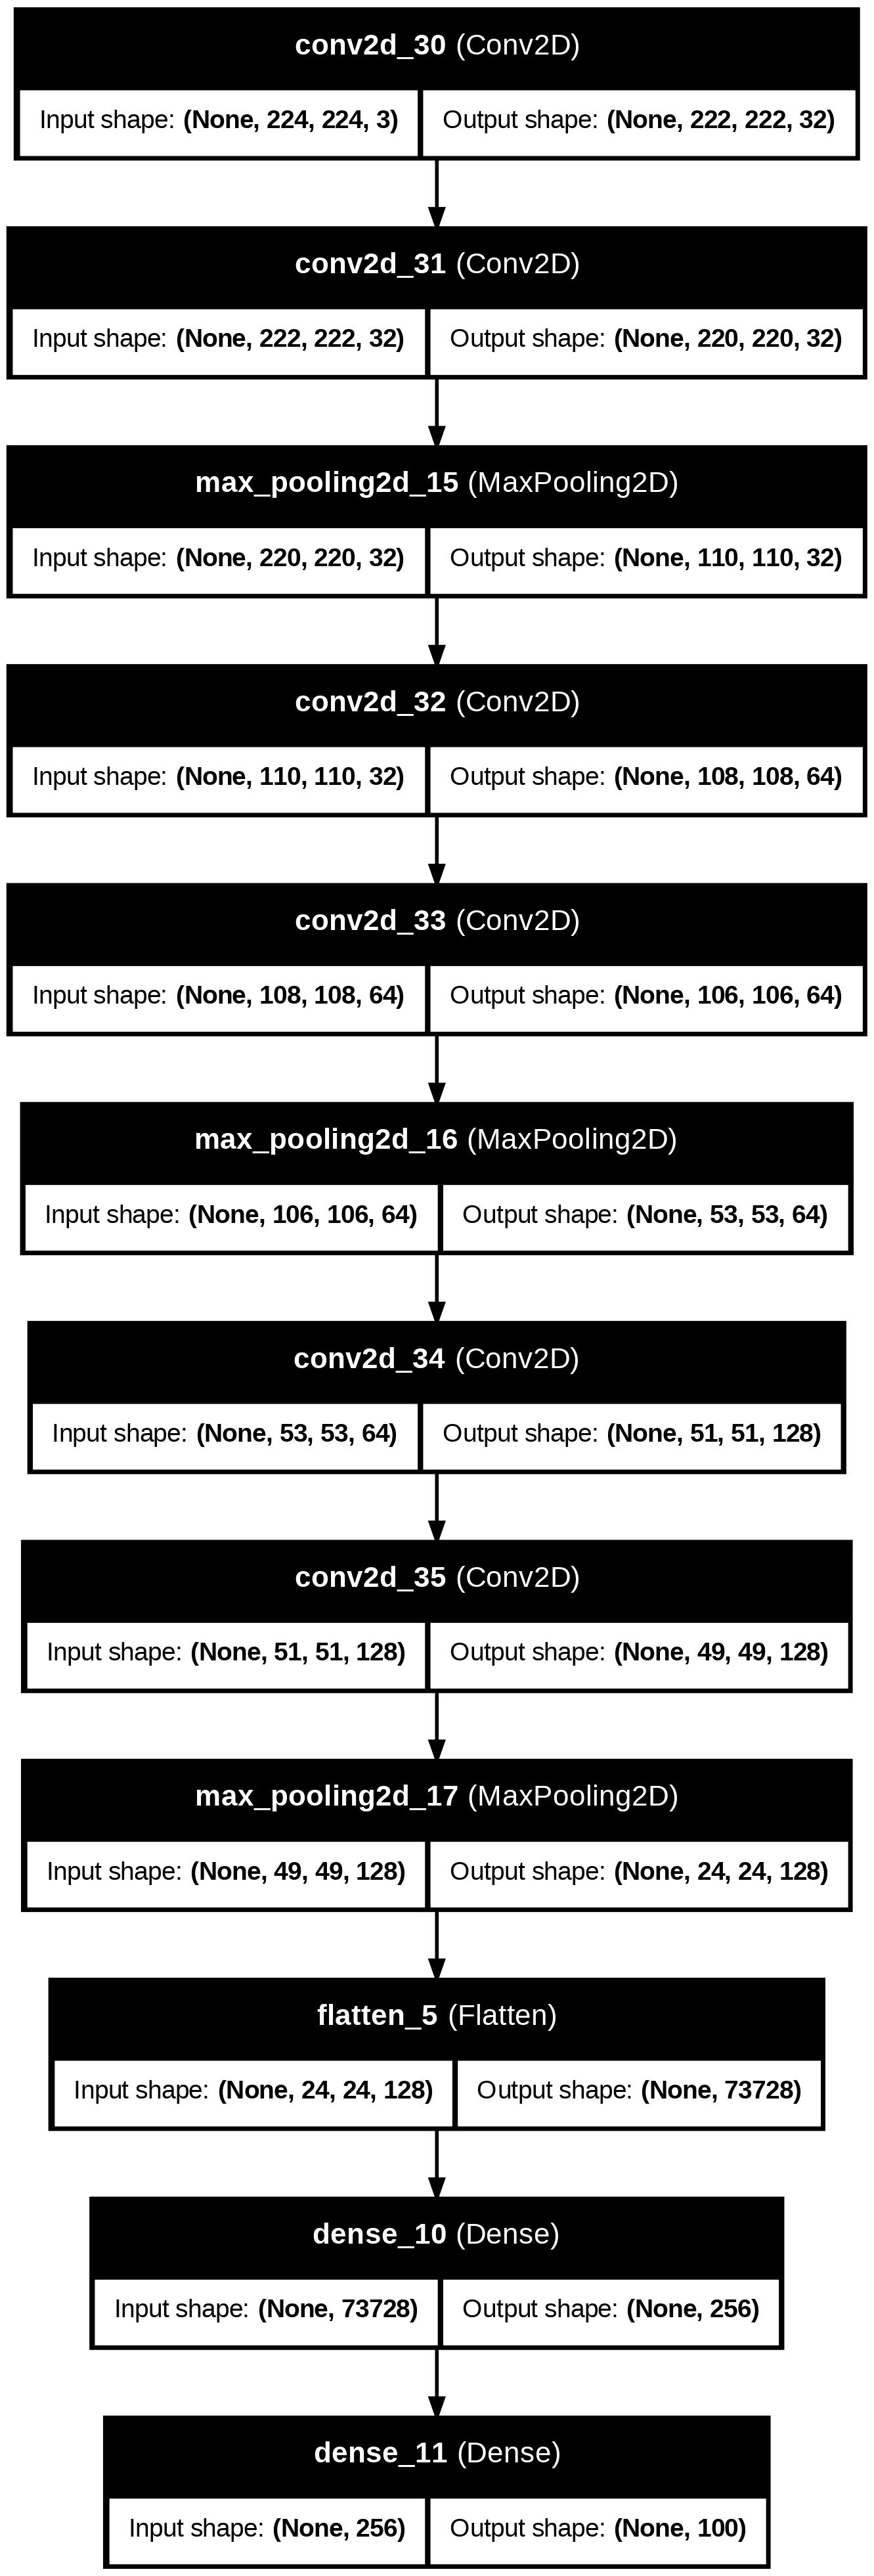

In [ ]:
## model diagram

from tensorflow.keras.utils import plot_model

# Save the model architecture as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the model architecture image in the notebook
from IPython.display import Image
Image('model_architecture.png')


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 4: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Step 5: Get training and validation accuracy from history
train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

# Print the accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Step 6: Get predictions for the test set
y_pred_probabilities = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Get true labels from the test generator
y_true = test_generator.classes

# Step 7: Calculate accuracy for each class
num_classes = len(test_generator.class_indices)
class_accuracies = []

for i in range(num_classes):
    class_mask = (y_true == i)  # Create a mask for the true labels
    class_accuracy = np.sum(y_pred_classes[class_mask] == i) / np.sum(class_mask)  # Calculate accuracy for this class
    class_accuracies.append(class_accuracy)

# Print per-class accuracies
for i, acc in enumerate(class_accuracies):
    print(f'Accuracy for class {i}: {acc:.2f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.3593 - loss: 2.6396
Test Accuracy: 0.36
Training Accuracy: 0.44
Validation Accuracy: 0.44
16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step
Accuracy for class 0: 0.00
Accuracy for class 1: 0.00
Accuracy for class 2: 0.00
Accuracy for class 3: 0.00
Accuracy for class 4: 0.00
Accuracy for class 5: 0.20
Accuracy for class 6: 0.00
Accuracy for class 7: 0.00
Accuracy for class 8: 0.00
Accuracy for class 9: 0.00
Accuracy for class 10: 0.00
Accuracy for class 11: 0.00
Accuracy for class 12: 0.00
Accuracy for class 13: 0.00
Accuracy for class 14: 0.00
Accuracy for class 15: 0.00
Accuracy for class 16: 0.00
Accuracy for class 17: 0.00
Accuracy for class 18: 0.00
Accuracy for class 19: 0.00
Accuracy for class 20: 0.00
Accuracy for class 21: 0.00
Accuracy for class 22: 0.00
Accuracy for class 23: 0.00
Accuracy for class 24: 0.00
Accuracy for class 25: 0.00
Accuracy for class 26: 0.00
Accuracy for class 27: 0.00
Accuracy for class 28: 0.00
Accuracy for cla

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Step 4: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Step 5: Get training and validation accuracy from history
train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy

# Print the accuracies
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Step 6: Get predictions and true labels from the test generator
y_pred_classes = []
y_true = []

# Loop through test_generator to collect predictions and true labels
for i in range(len(test_generator)):
    X, y = test_generator[i]
    y_pred_probabilities = model.predict(X)
    y_pred_classes.extend(np.argmax(y_pred_probabilities, axis=1))  # Get predicted classes
    y_true.extend(np.argmax(y, axis=1))  # Get true classes

y_pred_classes = np.array(y_pred_classes)
y_true = np.array(y_true)

# Step 7: Calculate accuracy for each class
num_classes = len(test_generator.class_indices)
class_accuracies = []

for i in range(num_classes):
    class_mask = (y_true == i)  # Create a mask for the true labels
    class_accuracy = np.sum(y_pred_classes[class_mask] == i) / np.sum(class_mask)  # Calculate accuracy for this class
    class_accuracies.append(class_accuracy)

# Print per-class accuracies
for i, acc in enumerate(class_accuracies):
    print(f'Accuracy for class {i}: {acc * 100:.2f}%')


NameError: name 'model' is not defined

In [ ]:
# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes  # True labels

16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step


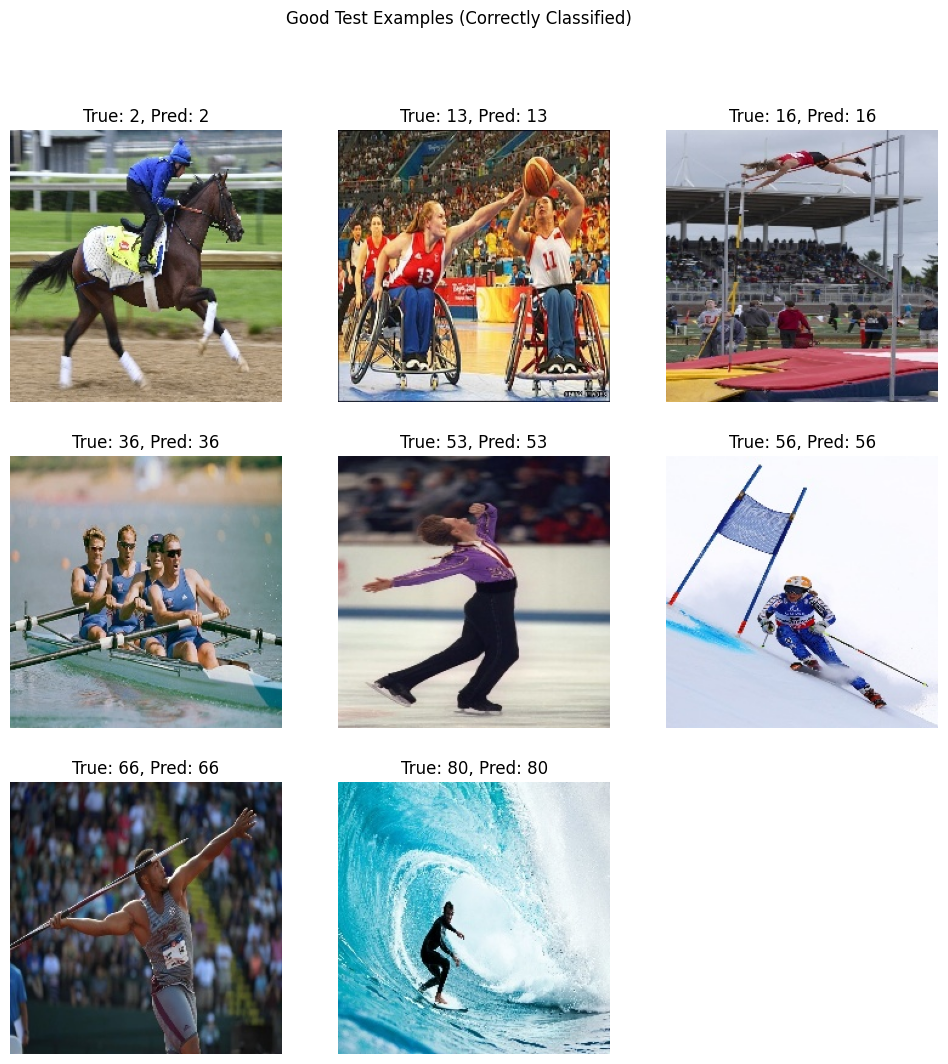

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to extract images and labels from the generator
def get_images_from_generator(generator, indices):
    images = []
    labels = []
    for idx in indices:
        batch_idx = idx // generator.batch_size
        img_idx = idx % generator.batch_size
        # Load the batch
        img_batch, label_batch = generator[batch_idx]
        images.append(img_batch[img_idx])
        labels.append(label_batch[img_idx])
    return np.array(images), np.array(labels)

# Visualize examples
def visualize_examples(indices, title):
    images, labels = get_images_from_generator(test_generator, indices)  # Get images and labels
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(indices[:9]):  # Visualize first 9 examples
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Find indices where the model correctly classified the images
correct_idx = np.where(y_true == y_pred_classes)[0]

# Visualize some good test examples
visualize_examples(correct_idx, "Good Test Examples (Correctly Classified)")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to extract images and labels from the generator
def get_images_from_generator(generator, indices):
    images = []
    labels = []
    for idx in indices:
        batch_idx = idx // generator.batch_size
        img_idx = idx % generator.batch_size
        # Load the batch
        img_batch, label_batch = generator[batch_idx]
        images.append(img_batch[img_idx])
        labels.append(label_batch[img_idx])
    return np.array(images), np.array(labels)

# Visualize examples
def visualize_examples(indices, title):
    images, labels = get_images_from_generator(test_generator, indices)  # Get images and labels
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(indices[:9]):  # Visualize first 9 examples
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Find indices where the model incorrectly classified the images
incorrect_idx = np.where(y_true != y_pred_classes)[0]

# Visualize some bad test examples
visualize_examples(incorrect_idx, "Bad Test Examples (Incorrectly Classified)")


NameError: name 'y_true' is not defined